In [1]:
print("KERAS NEURAL NETWORK")

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

#  (diastolic pressure) that's between 60 and less than 80

In [3]:
dataset = pd.read_csv('pimadataorig.csv')
dataset.head(15)


,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Positve 500
Negetive 268


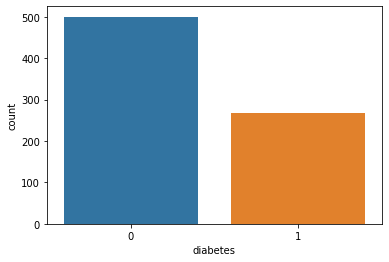

In [4]:
ax = sns.countplot(dataset['diabetes'],label='Count')
P,N = dataset['diabetes'].value_counts()
print('Positve', P)
print('Negetive', N)

In [31]:
df = pd.DataFrame(dataset)
df['insulin'].replace(to_replace=0, value = df['insulin'].median(), inplace = True)
df['skin_thickness'].replace(to_replace=0, value = df['skin_thickness'].median(), inplace = True)
df['diastolic_bp'].replace(to_replace=0, value = df['diastolic_bp'].median(), inplace = True)
df['bmi'].replace(to_replace=0, value = df['bmi'].median(), inplace = True)
df['age'].replace(to_replace=0, value = df['age'].median(), inplace = True)
df['glucose_conc'].replace(to_replace=0, value = df['glucose_conc'].median(), inplace = True)
df.head(6)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0


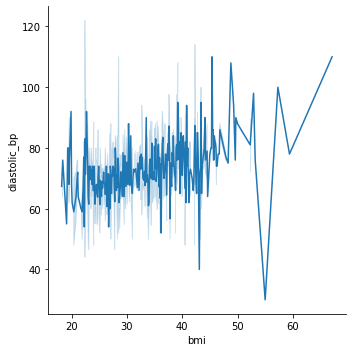

In [6]:
bmi_vs_bp = sns.relplot(x="bmi", y="diastolic_bp", kind="line", data=df)

In [137]:
from sklearn.model_selection import train_test_split
df_split=df.copy()
train_set = df_split.sample(frac=0.85, random_state=0)
test_set = df_split.drop(train_set.index)
X_train = train_set.iloc[:,0:8]
y_train = train_set.iloc[:,8]
X_test = test_set.iloc[:,0:8]
y_test = test_set.iloc[:,8]


In [138]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [139]:
import keras
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout

In [152]:
classifier = Sequential()
classifier.add(Dense(output_dim = 4, init = 'uniform', activation = 'relu', input_dim = 7))
classifier.add(Dropout(0.3))
classifier.add(Dense(output_dim = 4, init = 'uniform', activation = 'relu',))
classifier.add(Dropout(0.3))
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=7, units=4, kernel_initializer="uniform")`
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=4, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [178]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [195]:
classifier.fit( X_train, y_train, batch_size=100, nb_epoch = 120)

Epoch 1/120
653/653 [==============================] - 0s 21us/step - loss: 0.5351 - accuracy: 0.7443
Epoch 2/120
653/653 [==============================] - 0s 18us/step - loss: 0.5043 - accuracy: 0.7473
Epoch 3/120
653/653 [==============================] - 0s 22us/step - loss: 0.5325 - accuracy: 0.7504
Epoch 4/120
653/653 [==============================] - 0s 18us/step - loss: 0.5407 - accuracy: 0.7274
Epoch 5/120
653/653 [==============================] - 0s 25us/step - loss: 0.5402 - accuracy: 0.7351
Epoch 6/120
653/653 [==============================] - 0s 19us/step - loss: 0.5231 - accuracy: 0.7366
Epoch 7/120
653/653 [==============================] - 0s 19us/step - loss: 0.5292 - accuracy: 0.7473
Epoch 8/120
653/653 [==============================] - 0s 21us/step - loss: 0.5316 - accuracy: 0.7259
Epoch 9/120
653/653 [==============================] - 0s 18us/step - loss: 0.5385 - accuracy: 0.7473
Epoch 10/120
653/653 [==============================] - 0s 22us/step - loss: 0.543

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 13/120
653/653 [==============================] - 0s 23us/step - loss: 0.5338 - accuracy: 0.7596
Epoch 14/120
653/653 [==============================] - 0s 19us/step - loss: 0.5316 - accuracy: 0.7305
Epoch 15/120
653/653 [==============================] - 0s 23us/step - loss: 0.5188 - accuracy: 0.7198
Epoch 16/120
653/653 [==============================] - 0s 20us/step - loss: 0.5132 - accuracy: 0.7443
Epoch 17/120
653/653 [==============================] - 0s 20us/step - loss: 0.5346 - accuracy: 0.7289
Epoch 18/120
653/653 [==============================] - 0s 23us/step - loss: 0.5083 - accuracy: 0.7427
Epoch 19/120
653/653 [==============================] - 0s 19us/step - loss: 0.5460 - accuracy: 0.7305
Epoch 20/120
653/653 [==============================] - 0s 22us/step - loss: 0.5128 - accuracy: 0.7473
Epoch 21/120
653/653 [==============================] - 0s 20us/step - loss: 0.5120 - accuracy: 0.7397
Epoch 22/120
653/653 [==============================] - 0s 18us/step - lo

653/653 [==============================] - 0s 23us/step - loss: 0.5135 - accuracy: 0.7320
Epoch 93/120
653/653 [==============================] - 0s 18us/step - loss: 0.5289 - accuracy: 0.7427
Epoch 94/120
653/653 [==============================] - 0s 20us/step - loss: 0.5308 - accuracy: 0.7427
Epoch 95/120
653/653 [==============================] - 0s 18us/step - loss: 0.5149 - accuracy: 0.7473
Epoch 96/120
653/653 [==============================] - 0s 22us/step - loss: 0.5294 - accuracy: 0.7397
Epoch 97/120
653/653 [==============================] - 0s 23us/step - loss: 0.4999 - accuracy: 0.7458
Epoch 98/120
653/653 [==============================] - 0s 17us/step - loss: 0.5080 - accuracy: 0.7351
Epoch 99/120
653/653 [==============================] - 0s 20us/step - loss: 0.5293 - accuracy: 0.7274
Epoch 100/120
653/653 [==============================] - 0s 18us/step - loss: 0.4926 - accuracy: 0.7611
Epoch 101/120
653/653 [==============================] - 0s 16us/step - loss: 0.5287 

In [196]:
classifier.fit( X_test, y_test, batch_size=100, nb_epoch = 120 )

Epoch 1/120
115/115 [==============================] - 0s 48us/step - loss: 0.5263 - accuracy: 0.7391
Epoch 2/120
115/115 [==============================] - 0s 61us/step - loss: 0.5138 - accuracy: 0.7304
Epoch 3/120
115/115 [==============================] - 0s 48us/step - loss: 0.5220 - accuracy: 0.7739
Epoch 4/120
115/115 [==============================] - 0s 57us/step - loss: 0.4971 - accuracy: 0.7826
Epoch 5/120
115/115 [==============================] - 0s 52us/step - loss: 0.5235 - accuracy: 0.7478
Epoch 6/120
115/115 [==============================] - 0s 66us/step - loss: 0.4994 - accuracy: 0.7826
Epoch 7/120
115/115 [==============================] - 0s 74us/step - loss: 0.5158 - accuracy: 0.7478
Epoch 8/120
115/115 [==============================] - 0s 52us/step - loss: 0.4816 - accuracy: 0.7565
Epoch 9/120
115/115 [==============================] - 0s 57us/step - loss: 0.5341 - accuracy: 0.7217
Epoch 10/120
115/115 [==============================] - 0s 57us/step - loss: 0.470

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


115/115 [==============================] - 0s 70us/step - loss: 0.5028 - accuracy: 0.7304
Epoch 20/120
115/115 [==============================] - 0s 61us/step - loss: 0.5140 - accuracy: 0.7652
Epoch 21/120
115/115 [==============================] - 0s 52us/step - loss: 0.5492 - accuracy: 0.7391
Epoch 22/120
115/115 [==============================] - 0s 44us/step - loss: 0.4800 - accuracy: 0.8000
Epoch 23/120
115/115 [==============================] - 0s 70us/step - loss: 0.5109 - accuracy: 0.7565
Epoch 24/120
115/115 [==============================] - 0s 66us/step - loss: 0.5259 - accuracy: 0.7130
Epoch 25/120
115/115 [==============================] - 0s 52us/step - loss: 0.4953 - accuracy: 0.8000
Epoch 26/120
115/115 [==============================] - 0s 52us/step - loss: 0.5099 - accuracy: 0.7304
Epoch 27/120
115/115 [==============================] - 0s 61us/step - loss: 0.4756 - accuracy: 0.7652
Epoch 28/120
115/115 [==============================] - 0s 48us/step - loss: 0.5067 - 

115/115 [==============================] - 0s 48us/step - loss: 0.5157 - accuracy: 0.7652
Epoch 99/120
115/115 [==============================] - 0s 44us/step - loss: 0.4740 - accuracy: 0.7565
Epoch 100/120
115/115 [==============================] - 0s 52us/step - loss: 0.4770 - accuracy: 0.7826
Epoch 101/120
115/115 [==============================] - 0s 44us/step - loss: 0.4523 - accuracy: 0.7826
Epoch 102/120
115/115 [==============================] - 0s 39us/step - loss: 0.4832 - accuracy: 0.7565
Epoch 103/120
115/115 [==============================] - 0s 48us/step - loss: 0.4906 - accuracy: 0.7826
Epoch 104/120
115/115 [==============================] - 0s 44us/step - loss: 0.5174 - accuracy: 0.7652
Epoch 105/120
115/115 [==============================] - 0s 57us/step - loss: 0.5172 - accuracy: 0.7565
Epoch 106/120
115/115 [==============================] - 0s 48us/step - loss: 0.5217 - accuracy: 0.7652
Epoch 107/120
115/115 [==============================] - 0s 44us/step - loss: 0

In [191]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred > 7.0)


In [192]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
result=confusion_matrix(y_test,y_pred)
result

array([[78,  0],
       [37,  0]], dtype=int64)

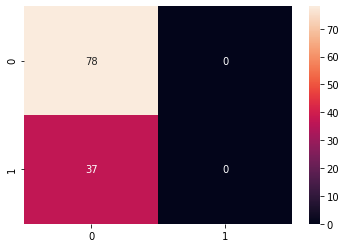

In [193]:
sns.heatmap(result,annot=True)
plt.savefig('he.map.png')

In [194]:
print('Accuracy Score :',accuracy_score(y_test, y_pred) )
print('Report : ')
print(classification_report(y_test, y_pred))

Accuracy Score : 0.6782608695652174
Report : 
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        78
           1       0.00      0.00      0.00        37

    accuracy                           0.68       115
   macro avg       0.34      0.50      0.40       115
weighted avg       0.46      0.68      0.55       115

